<a href="https://colab.research.google.com/github/felipefreitasbr/quarentena-de-dados/blob/master/Aula_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lendo os dados do MovieLens

Existem dois arquivos, que estão no Github da Alura. O primeiro é uma base de dados com o ID do filme, o nome (título) e gênero. Vamos acessar esse arquivo diretamente do Github, utilizando a função pd.read_csv do Pandas.

In [0]:
import pandas as pd

base_dados = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
base_dados.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
base_dados.shape

(9742, 3)

Outras informações como a avaliação dos usuários encontram-se em outro arquivo, o qual leremos agora.

In [0]:
ratings = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
base_dados.shape

(100836, 4)

Podemos filtrar um determinado filme extrair algumas estatísticas descritivas sobre as notas dele. Por exemplo, para o filme Toy Story 1 (movieId = 1), faríamos assim:

In [0]:
ratings.query("movieId == 1").describe()

,userId,movieId,rating,timestamp
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


O output mostra que esse filme recebeu 215 avaliações de usuários, com uma média de 3,92. A menor nota foi 0,5, a maior 5, portanto a escala deve ser de 0 a 5. Além disso, a mediana igual a 4 indica que a média não parece sofrer a influência de valores muito extremos.

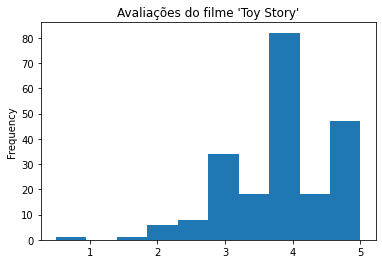

In [0]:
ratings.query("movieId == 1")["rating"].plot(kind='hist', title = "Avaliações do filme 'Toy Story'")

Não faz sentido extrair estatísticas descritivas das outras colunas, então eu poderia ter extraído diretamente só da coluna "rating" a partir do código a seguir:

In [0]:
ratings.query("movieId == 1")["rating"].describe()

count    215.000000
mean       3.920930
std        0.834859
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: rating, dtype: float64

Agora vamos extrair a avaliação média para cada filme.

In [0]:
media_por_filme = ratings.groupby("movieId")["rating"].mean()
media_por_filme.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

In [0]:
len(media_por_filme)

9724

Se nossa base de filmes têm 9.742 títulos, 18 não foram avaliados (pelo menos no arquivo fornecido para o exercício).

Vamos agregar essas notas médias ao nosso dataframe base_dados 

In [0]:
type(base_dados)

pandas.core.frame.DataFrame

In [0]:
filmes_nota_media = base_dados.join(media_por_filme, on = "movieId")
filmes_nota_media.head(10)

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
5,6,Heat (1995),Action|Crime|Thriller,3.946078
6,7,Sabrina (1995),Comedy|Romance,3.185185
7,8,Tom and Huck (1995),Adventure|Children,2.875000
8,9,Sudden Death (1995),Action,3.125000
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.496212


#Resposta ao Desafio 1

Os 18 filmes que não receberam nenhuma avaliação devem estar como NaN após a utilização do método *join*. Há duas formas de identificá-los:

In [0]:
#Ao ordenar o data frame, os valores nulos vão para o final. O método tail traz os últimos valores.
#Vamos utilizá-lo configurando para mostrar os últimos 20 valores, só para ter certeza (esperamos que dois valores mostrados sejam diferentes de NaN).
filmes_nota_media.sort_values("rating").tail(20)

,movieId,title,genres,rating
7978,96608,Runaway Brain (1995),Animation|Comedy|Sci-Fi,5.0
6499,53355,Sun Alley (Sonnenallee) (1999),Comedy|Romance,5.0
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN


In [0]:
#Outra forma é filtrando diretamente
filmes_nota_media[filmes_nota_media["rating"].isnull()]

,movieId,title,genres,rating
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


#Resposta ao Desafio 2

Renomeando colunas

In [0]:
filmes_nota_media.columns = ['movieId', 'title', 'genres', 'nota_média']
filmes_nota_media.head()

,movieId,title,genres,nota_média
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [0]:
#ou ainda
filmes_nota_media.rename(columns={'genres':'genre'}, inplace=True)
filmes_nota_media.head()

,movieId,title,genre,nota_média
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


#Resposta ao Desafio 3

Além da nota_média, vamos incluir o total de avaliações por filme.

In [0]:
num_avaliacoes_por_filme = ratings.groupby("movieId")["rating"].count()
num_avaliacoes_por_filme.head(10)

movieId
1     215
2     110
3      52
4       7
5      49
6     102
7      54
8       8
9      16
10    132
Name: rating, dtype: int64

In [0]:
filmes_nota_media = filmes_nota_media.join(num_avaliacoes_por_filme, on = "movieId")

In [0]:
filmes_nota_media.rename(columns={'rating':'reviews'}, inplace=True)
filmes_nota_media.head()

,movieId,title,genres,nota_média,reviews
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


#Resposta ao Desafio 4

Arredondar as notas para duas casas decimais

In [0]:
filmes_nota_media['nota_média'] = filmes_nota_media['nota_média'].round(2)
filmes_nota_media.head()

#Resposta ao Desafio 5

Quais são os gêneros dos filmes? (únicos)

In [0]:
filmes_nota_media['genres'].str.split("|", expand=True).stack().unique()

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX',
       'Western', 'Film-Noir', '(no genres listed)'], dtype=object)

Ou

In [0]:
pd.unique(filmes_nota_media['genres'].str.split('|', expand=True)[0])

array(['Adventure', 'Comedy', 'Action', 'Drama', 'Crime', 'Children',
       'Mystery', 'Animation', 'Documentary', 'Thriller', 'Horror',
       'Fantasy', 'Western', 'Film-Noir', 'Romance', 'Sci-Fi', 'Musical',
       'War', '(no genres listed)'], dtype=object)

#Desafio 6

Contar o número de aparições de cada gênero.

In [0]:
generos = filmes_nota_media['genres'].str.split("|").sum()

In [0]:
generos_count = pd.Series(generos).value_counts().to_dict()
generos_count

{'(no genres listed)': 34,
 'Action': 1828,
 'Adventure': 1263,
 'Animation': 611,
 'Children': 664,
 'Comedy': 3756,
 'Crime': 1199,
 'Documentary': 440,
 'Drama': 4361,
 'Fantasy': 779,
 'Film-Noir': 87,
 'Horror': 978,
 'IMAX': 158,
 'Musical': 334,
 'Mystery': 573,
 'Romance': 1596,
 'Sci-Fi': 980,
 'Thriller': 1894,
 'War': 382,
 'Western': 167}

#Resposta do Desafio 7

In [0]:
import matplotlib.pyplot as plt

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

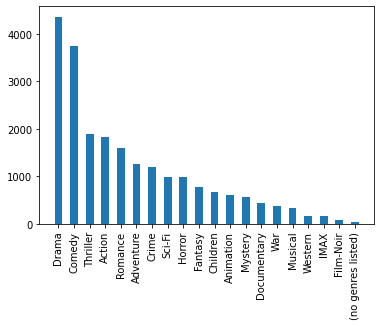

In [0]:
plt.bar(generos_count.keys(), generos_count.values(), 0.5)
plt.xticks(rotation=90)